In [1]:
%matplotlib inline

In [2]:
#1. Import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#2. Extract data from Excel
handle_excel = pd.ExcelFile("yelp.xlsx")
yelp_sheet = handle_excel.parse("yelp_data")
cities = handle_excel.parse("cities")
states = handle_excel.parse("states")
df = pd.merge(left = yelp_sheet, right = cities, how = 'inner', left_on = "city_id", right_on = "id")
df = pd.merge(left = df, right = states, how ='inner', left_on = "state_id", right_on = "id")
df.head()

C:\Users\ADMIN\anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
C:\Users\ADMIN\anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
C:\Users\ADMIN\anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,name,category_0,category_1,take_out,review_count,stars,city_id,state_id,id_x,city,id_y,state
0,China Sea Chinese Restaurant,Restaurants,Chinese,True,11,2.5,1,1,1,Bellevue,1,PA
1,Discount Tire Center,Tires,Automotive,False,24,4.5,1,1,1,Bellevue,1,PA
2,Frankfurters,Restaurants,Hot Dogs,True,3,4.5,1,1,1,Bellevue,1,PA
3,Fred Dietz Floral,Shopping,Flowers & Gifts,False,6,4.0,1,1,1,Bellevue,1,PA
4,Kuhn's Market,Food,Grocery,False,8,3.5,1,1,1,Bellevue,1,PA


In [4]:
#3. Clear redundant columns
del df['id_x']
del df['id_y']

In [5]:
df_pitt = df[df['city'] == 'Pittsburgh']
df_pitt.head()

,name,category_0,category_1,take_out,review_count,stars,city_id,state_id,city,state
95,Aamco Transmissions,Auto Repair,Automotive,False,21,4.5,8,1,Pittsburgh,PA
96,Animal Rescue League Shelter & Wildlife Center,Animal Shelters,Veterinarians,False,43,4.0,8,1,Pittsburgh,PA
97,Aracri's Greentree Inn,Italian,American (New),True,15,3.5,8,1,Pittsburgh,PA
98,Atch-Mont Real Estate,Real Estate Services,Property Management,False,3,2.0,8,1,Pittsburgh,PA
99,Atria's Restaurant,American (New),Sandwiches,True,69,3.0,8,1,Pittsburgh,PA


In [6]:
df_vegas = df[df['city'] == 'Las Vegas']
df_vegas.head()

,name,category_0,category_1,take_out,review_count,stars,city_id,state_id,city,state
430,Reliable Tax Services,Financial Services,Accountants,False,3,4.5,12,2,Las Vegas,NV
431,Paradise Electro Stimulations,Shopping,Adult,False,4,4.5,12,2,Las Vegas,NV
432,The Studio,Shopping,Adult,False,7,5.0,12,2,Las Vegas,NV
433,Boomer's Bar,Bars,American (Traditional),False,19,3.5,12,2,Las Vegas,NV
434,Omelet House,Breakfast & Brunch,American (Traditional),True,703,4.5,12,2,Las Vegas,NV


In [7]:
#4. Get the columns stars from DF to analyze
pitt_stars = df_pitt['stars']
vegas_stars = df_vegas['stars']
vegas_stars.head() #this is a Series

430    4.5
431    4.5
432    5.0
433    3.5
434    4.5
Name: stars, dtype: float64

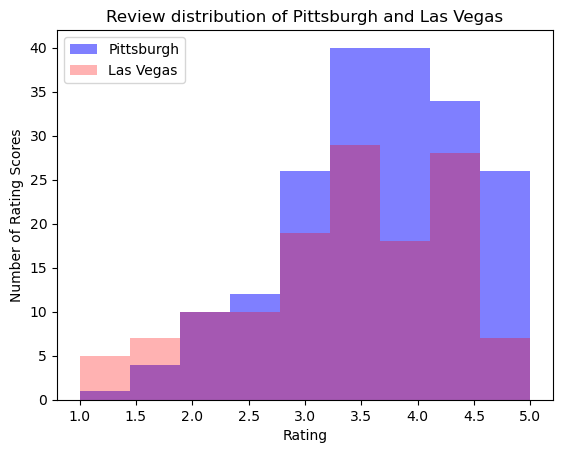

In [8]:
plt.hist(
    pitt_stars,
    alpha = 0.5,
    color = 'blue',
    label = 'Pittsburgh',
    bins = 'auto'
)

plt.hist(
    vegas_stars,
    alpha = 0.3,
    color = 'red',
    label = 'Las Vegas',
    bins = 'auto'
)
#Set the names for axes
plt.xlabel("Rating")
plt.ylabel("Number of Rating Scores")

#Set the legend
plt.legend(loc='best')

#Set the title of the chart
plt.title("Review distribution of Pittsburgh and Las Vegas")

plt.show()

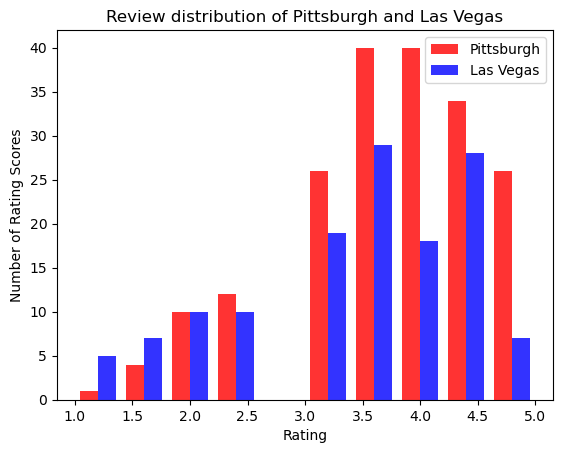

In [9]:
plt.hist(
    [pitt_stars, vegas_stars],
    alpha = 0.8,
    color = ['red', 'blue'],
    label = ['Pittsburgh', 'Las Vegas'],
    bins = 'auto'
)

plt.xlabel('Rating')
plt.ylabel('Number of Rating Scores')

plt.legend(loc ='best')

plt.title('Review distribution of Pittsburgh and Las Vegas')
plt.show()

In [11]:
df_health = df[df['category_0'] == 'Health & Medical']
df_fast = df[df['category_0'] == 'Fast Food']
df_break = df[df['category_0'] == 'Breakfast & Brunch']
df_break.head()

,name,category_0,category_1,take_out,review_count,stars,city_id,state_id,city,state
24,Gab & Eat,Breakfast & Brunch,Sandwiches,True,69,4.5,3,1,Carnegie,PA
131,Crepes Parisiennes,Breakfast & Brunch,Creperies,True,73,4.0,8,1,Pittsburgh,PA
240,Ritters Diner,Breakfast & Brunch,American (Traditional),True,146,3.5,8,1,Pittsburgh,PA
266,The Bloomfield Sandwich Shop,Breakfast & Brunch,Sandwiches,True,41,4.0,8,1,Pittsburgh,PA
268,The Dor-Stop Restaurant,Breakfast & Brunch,Diners,True,275,4.5,8,1,Pittsburgh,PA


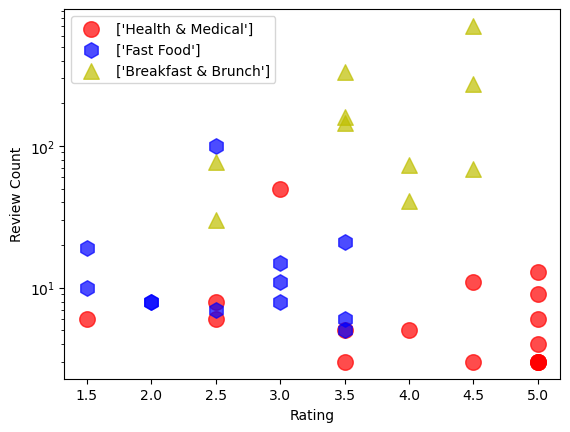

In [14]:
#Create scatter plot
plt.scatter(
    df_health['stars'], df_health['review_count'],
    marker ='o',
    color = 'r',
    alpha = 0.7,
    s = 125,
    label = ['Health & Medical']
)

plt.scatter(
    df_fast['stars'], df_fast['review_count'],
    marker ='h',
    color = 'b',
    alpha = 0.7,
    s = 125,
    label = ['Fast Food']
)

plt.scatter(
    df_break['stars'], df_break['review_count'],
    marker ='^',
    color = 'y',
    alpha = 0.7,
    s = 125,
    label = ['Breakfast & Brunch']
)

plt.xlabel('Rating')
plt.ylabel('Review Count')

plt.legend(loc='upper left')

axes = plt.gca()
axes.set_yscale('log')

plt.show()

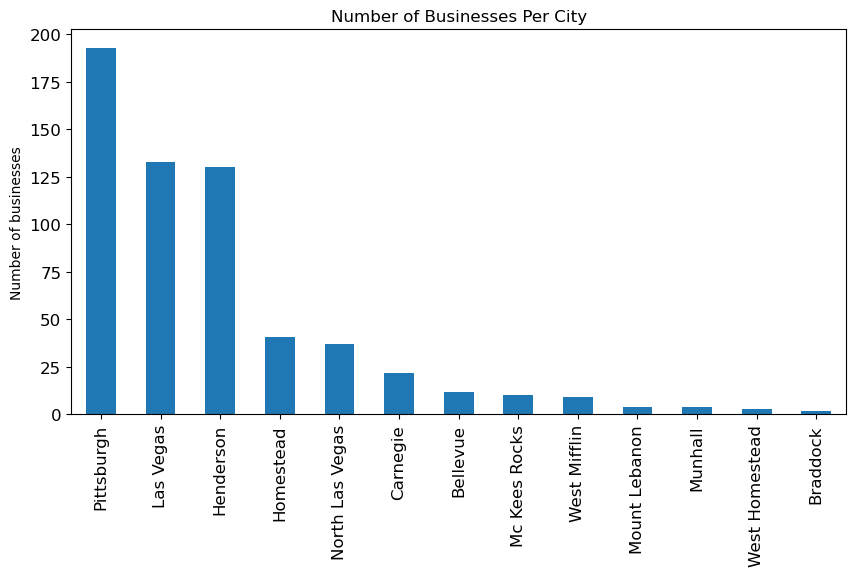

In [16]:
#Create barchart
df_city_value_counts = df['city'].value_counts()

df_city_value_counts.plot(
    kind ='bar',
    figsize=(10,5),
    fontsize =12,
    legend = False,
    title = 'Number of Businesses Per City'
)

plt.ylabel('Number of businesses')
plt.show()

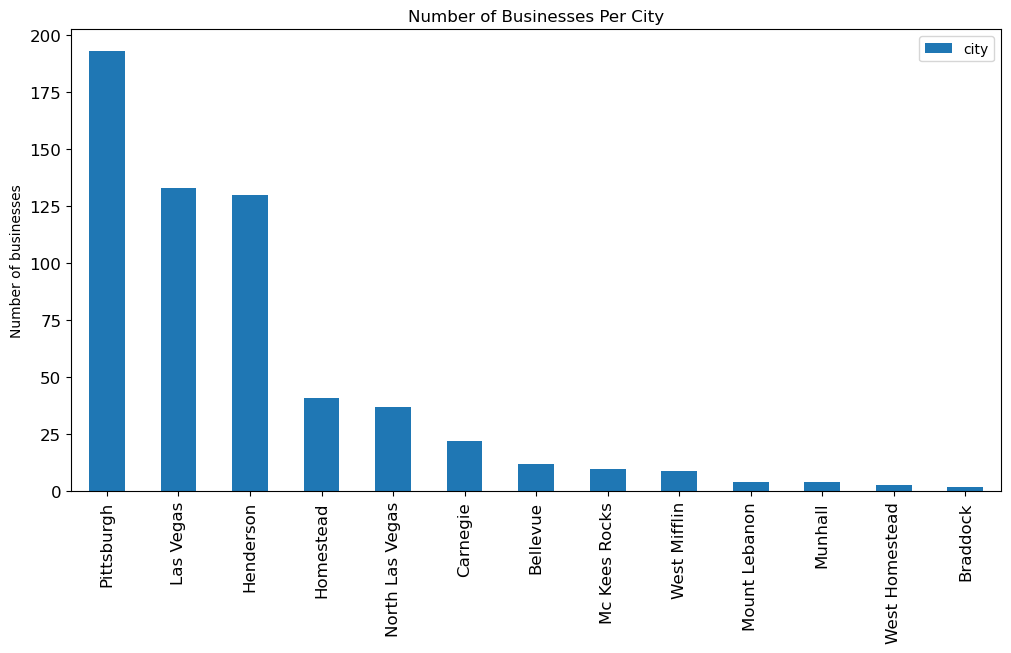

In [18]:
df_city_value_counts.plot(
    kind ='bar',
    figsize=(12,6), #NOTE
    fontsize =12,
    legend = True, #NOTE
    title = 'Number of Businesses Per City'
)

plt.ylabel('Number of businesses')
plt.show()

In [19]:
#Chart with pivot table
df_bar_rest = df[df['category_0'].isin(['Bars', 'Restaurants'])]

#pivot along bar and restaurant category
pivot_state_cat = pd.pivot_table(df_bar_rest, index = ['category_0'])
pivot_state_cat

,city_id,review_count,stars,state_id,take_out
category_0,,,,,
Bars,7.625000,32.000000,3.500000,1.250000,0.750000
Restaurants,8.267606,85.535211,3.295775,1.352113,0.915493


In [21]:
#filter the df_bar_rest DataFrame columns 
pivot_state_cat = pivot_state_cat[["stars"]]
pivot_state_cat

,stars
category_0,
Bars,3.500000
Restaurants,3.295775


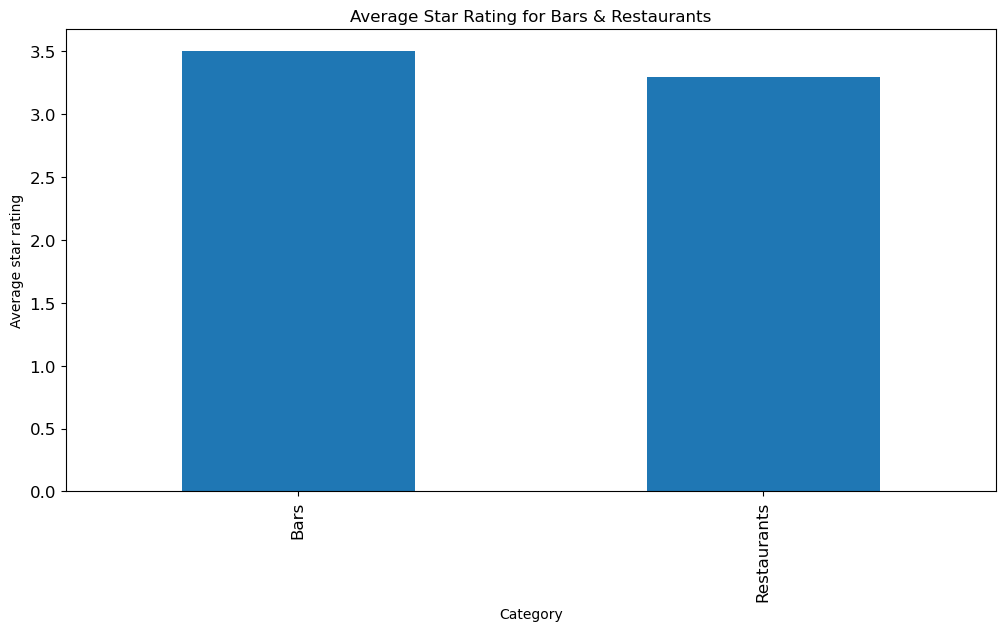

In [22]:
pivot_state_cat.plot(kind='bar', figsize=(12, 6), fontsize=12,
legend=False, title="Average Star Rating for Bars & Restaurants")
plt.xlabel("Category")
plt.ylabel("Average star rating")
plt.show()